<a href="https://colab.research.google.com/github/2020danielli/ODEs/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

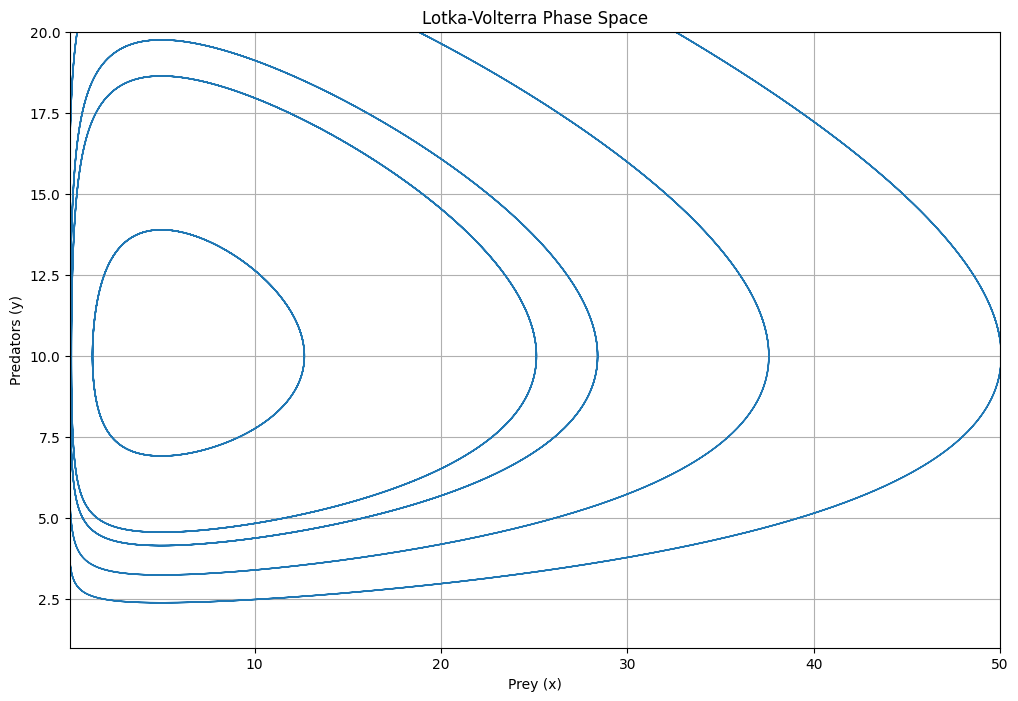

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Lotka-Volterra parameters
k = 1.0
l = 0.1
a = 0.1
b = 0.02

# Initial conditions
x_min = 0.1
x_max = 50
y_min = 1
y_max = 20
n_points = 5

# Time parameters
t_start = 0
t_end = 100
num_points = 10000

# Time step size
dt = (t_end - t_start) / num_points

# Define the Lotka-Volterra equations
def lotka_volterra(x, y, k, l, a, b):
    dxdt = k * x - l * x * y
    dydt = -a * y + b * x * y
    return dxdt, dydt

# Function to simulate and plot the Lotka-Volterra system
def simulate_lotka_volterra(use_euler, x_min, x_max, y_min, y_max, n_points):
    x_values = []
    y_values = []
    for x0 in np.linspace(x_min, x_max, n_points):
        y0 = (y_min+y_max)/2
        initial_conditions = [x0, y0]
        x, y = initial_conditions
        x_curve = [x]
        y_curve = [y]
        for _ in range(int((t_end - t_start) / dt)):
            if use_euler:
                dxdt, dydt = lotka_volterra(x, y, k, l, a, b)
                x += dt * dxdt
                y += dt * dydt
            else:
                k1x, k1y = lotka_volterra(x, y, k, l, a, b)
                k2x, k2y = lotka_volterra(x + 0.5 * dt * k1x, y + 0.5 * dt * k1y, k, l, a, b)
                k3x, k3y = lotka_volterra(x + 0.5 * dt * k2x, y + 0.5 * dt * k2y, k, l, a, b)
                k4x, k4y = lotka_volterra(x + dt * k3x, y + dt * k3y, k, l, a, b)
                x += dt * (k1x + 2 * k2x + 2 * k3x + k4x) / 6
                y += dt * (k1y + 2 * k2y + 2 * k3y + k4y) / 6
            x_curve.append(x)
            y_curve.append(y)
        x_values.extend(x_curve)
        y_values.extend(y_curve)
        x_values.append(None)  # Add None to separate curves
        y_values.append(None)
    plt.figure(figsize=(12, 8))
    plt.title('Lotka-Volterra Phase Space')
    plt.xlabel('Prey (x)')
    plt.ylabel('Predators (y)')
    plt.plot(x_values, y_values, linewidth=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.grid()
    plt.show()

# Initial plot using Lotka-Volterra method
simulate_lotka_volterra(False, x_min, x_max, y_min, y_max, n_points)
